In [1]:
import pandas as pd

To understand the performance of our magnetic line tracing software, we ran a series of scenarios.  Our software has options that can be selected.  First, we can vary the number of points in the unstructured matrix that defines the magnetic field (B field) over space.  The matrix is a collection of random x,y,z points at which the three cartesian components of the B field are specified.  Second, we can vary the parameters for scipy ODE solver and the scipy interpolation routine used to integrate over the magnetic field line.  These parameters are tolerance, grid spacing (how far apart are the points on the field line which the solver finds), which ode method is used (i.e., RK23, RK45, or DOP853), and which interpolation method is used (i.e., linear or nearest neighbor).

We systematically vary these parameters:

1. Number of points in B field matrix: $10^4$ to $10^6$
2. Tolerance: $10^{-1}$ to $10^{-5}$
3. Grid spacing: $10^{-1}$ to $10^{-2}$
4. ODE method: RK23, RK45, or DOP853
5. Interpolation method: linear or nearest neighbor

All possible combinations of these parameters are used to trace a dipole magnetic field for which the analytic solution is known.  We collect the elapsed time (wall clock) that the trace procedure requires and the root-mean-square (RMS) difference between the numeric solution and the analytic solution.  

Looking at the two graphs below, we plot the elapsed time to complete the tracing versus the number of points in B field matrix, and we plot the RMS difference versus number of points in the B field matrix.  The various combinations listed above leads to 120 different elapsed time and RMS results.  For elapsed time, the results are largely independent of all of the parameters except the number of points in the B field matrix.  The other parameters do not cause significant variation in the results, leading to three clumps of points. On the log-log plot, elapsed time increases linearly with number points in the B field matrix.  For RMS difference, we see something similar, three clumps of points, and RMS difference decreases with the number of points in the B field matrix.  RMS difference has one outlier, which is due to variation in tolerance and is discussed below.

<AxesSubplot:xlabel='number points', ylabel='RMS'>

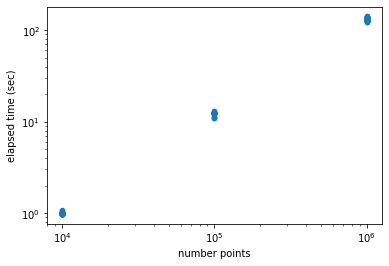

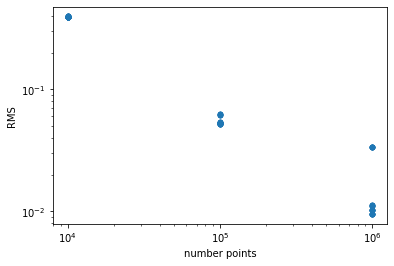

In [2]:
# Read results from timing_trace_unstructured()
results = pd.read_pickle("timing.pkl")

# Add a few columns based on the data in the dataframe
results['tolerance'] = 10**results['log(tolerance)']
results['number points'] = 10**results['log(number points)']
results['grid size'] = 10**results['log(grid size)']

# Plot results to identify patterns
results.plot('number points','elapsed time (sec)',kind='scatter', logy=True, logx=True)
results.plot('number points','RMS',kind='scatter', logy=True, logx=True)


We next plot elapsed time and RMS difference versus every other parameter to identify any potential patterns.  In general, neither elapsed time or RMS difference depends on the other parameters.  The one exception is with tolerance.  As expected, we see that the RMS difference will grow if the tolerance is made too large.  This growth is seen in the second plot immediately below. RMS difference grows in the bottom right corner when tolerance is increased to $10^{-2}$.  This is not surprising, at smaller tolerances (see bottom set of points), the RMS difference is of order $10^{-2}$.  When the tolerance is increased to the same size, the RMS difference grows.


<AxesSubplot:xlabel='tolerance', ylabel='RMS'>

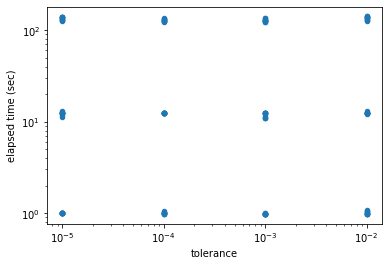

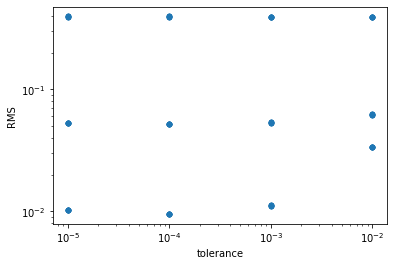

In [3]:
results.plot('tolerance','elapsed time (sec)',kind='scatter', logy=True, logx=True)
results.plot('tolerance','RMS',kind='scatter', logy=True, logx=True)

Otherwise, we do not see any significant patterns in the results.  Elapsed time and RMS difference are largely independent of the other parameters.

<AxesSubplot:xlabel='grid size', ylabel='RMS'>

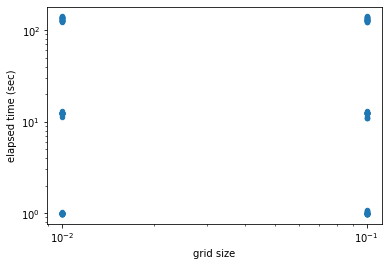

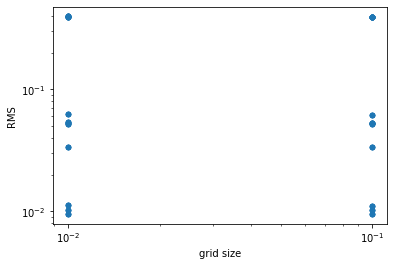

In [4]:
results.plot('grid size','elapsed time (sec)',kind='scatter', logy=True, logx=True)
results.plot('grid size','RMS',kind='scatter', logy=True, logx=True)

<AxesSubplot:xlabel='method ode', ylabel='RMS'>

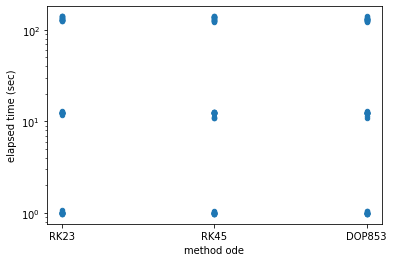

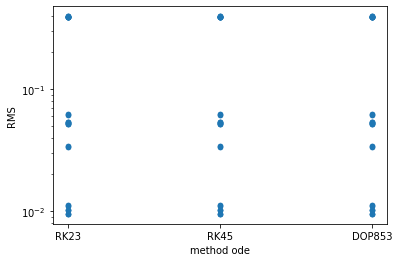

In [5]:
results.plot('method ode','elapsed time (sec)',kind='scatter', logy=True)
results.plot('method ode','RMS',kind='scatter', logy=True)

<AxesSubplot:xlabel='method interpolation', ylabel='RMS'>

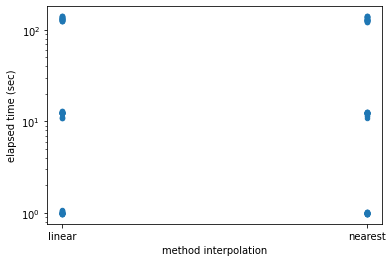

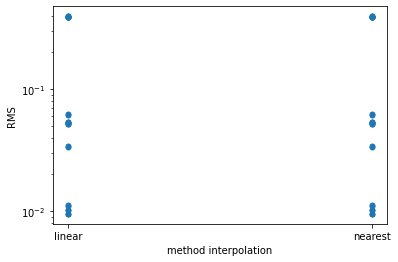

In [6]:
results.plot('method interpolation','elapsed time (sec)',kind='scatter', logy=True)
results.plot('method interpolation','RMS',kind='scatter', logy=True)